<a href="https://colab.research.google.com/github/hfwalvir/Python-PortfolioProjects/blob/main/Advanced_NLP_with_python_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
text = ("OnlineStoreinc. is planning to open a new store in San Francisco."
 "Cora Greene, the CEO, will be attending the event")

# **FOR NER USING spaCy**


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") #loading the english model for spacy

In [ ]:
doc = nlp(text)

In [ ]:
entities = [(ent.text,ent.label_) for ent in doc.ents]

In [ ]:
print("Named Entities :")
for entity , label in entities :
  print(f"{entity}-{label}")

Named Entities :
OnlineStoreinc-ORG
San Francisco-GPE
Cora Greene-PERSON


# **Dependency Parsing using spaCy**

In [ ]:
text = "Your products are amazing"
doc = nlp(text)

In [ ]:
#from unsructured data
from spacy import displacy
displacy.render(doc, style="dep",jupyter=True,options={'distance':90})

In [ ]:
#Part of Speech Tagging
pos_tags = [(token.text, token.pos_) for token in doc]
print("Parts of speech tags :")
for token, pos_tag in pos_tags:
  print(f"{token}-{pos_tag}")

Parts of speech tags :
Your-PRON
products-NOUN
are-AUX
amazing-ADJ


In [ ]:
#Exercise : Building a processing pipeline with a file
file_path = '/content/sample_data/sentiment_examples.txt'
with open(file_path, 'r',encoding='utf-8') as file:
  sentiment_texts = file.readlines()

In [ ]:
token_lists = []
filtered_token_lists = []
pos_tag_lists = []
ner_lists = []

In [ ]:
for sentiment_text in sentiment_texts:
  doc = nlp(sentiment_text.strip())

In [ ]:
#tokenization
tokens = [token.text for token in doc]
token_lists.append(tokens)

In [ ]:
#Stop word removal filter
filtered_tokens = [token.text for token in doc if not token.is_stop]
filtered_token_lists.append(filtered_tokens)

In [ ]:
#Part of speech tagging
pos_tags = [(token.text, token.pos_) for token in doc]
pos_tag_lists.append(pos_tags)

In [ ]:
#Named entity recognition
ner_entities = [(ent.text, ent.label_ ) for ent in doc.ents]
ner_lists.append(ner_entities)

In [ ]:
#creating a dataframe to roganize the results
import pandas as pd
results_df = pd.DataFrame({
    'Sentiment Example': sentiment_text,
    'Tokens': token_lists,
    'Filtered Tokens': filtered_token_lists,
    'POS Tags': pos_tag_lists,
    'Named Entities': ner_lists
})
print(results_df)

                                   Sentiment Example  \
0  "The delivery was prompt, and the packaging wa...   

                                              Tokens  \
0  [", The, delivery, was, prompt, ,, and, the, p...   

                                     Filtered Tokens  \
0  [", delivery, prompt, ,, packaging, secure, .,...   

                                            POS Tags Named Entities  
0  [(", PUNCT), (The, DET), (delivery, NOUN), (wa...             []  


In [ ]:
#exporting to csv
results_df.to_csv('processed_data.csv',index = False)


In [ ]:
processed_data = pd.read_csv('/content/processed_data.csv', encoding = 'latin-1')

In [ ]:
processed_data.head()

,Sentiment Example,Tokens,Filtered Tokens,POS Tags,Named Entities
0,"""The delivery was prompt, and the packaging wa...","['""', 'The', 'delivery', 'was', 'prompt', ',',...","['""', 'delivery', 'prompt', ',', 'packaging', ...","[('""', 'PUNCT'), ('The', 'DET'), ('delivery', ...",[]


In [ ]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [ ]:
file_path = '/content/feedback_data.csv'
with open (file_path, "r", encoding = "utf-8") as file:
  feedback_data = file.readlines()

In [ ]:
output_csv_path = "feedback_analysis.csv"


In [ ]:
#Preparing csv header
csv_header = ["Feedback Index",'Sentiment Polarity','Sentiment Subjectivity',"Named Entities",
              "Preferred Contact Method"]


In [ ]:
#opening the csv output file and writing
with open(output_csv_path,"w", newline="", encoding="utf-8") as csv_file:
  csv_writer = csv.writer(csv_file) #creating writer
  csv_writer.writerow(csv_header) #writing the header


In [ ]:
#Processing and analyzing each feedback:
with open (file_path, "r", encoding = "utf-8") as file:
  feedback_data = file.readlines()
  output_csv_path = "feedback_analysis.csv"
  csv_header = ["Feedback Index",'Sentiment Polarity','Sentiment Subjectivity',"Named Entities",
              "Preferred Contact Method"]
  with open(output_csv_path,"w", newline="", encoding="utf-8") as csv_file:
    csv_writer = csv.writer(csv_file) #creating writer
    csv_writer.writerow(csv_header) #writing the header


    for idx, narrative in enumerate(feedback_data,start=1):
      print(F"\nProcessing feedback {idx}:")
      print("-----------------------------")
      print(narrative.strip())
      #Performing sentiment analysis using TextBlob
      blob = TextBlob(narrative)
      sentiment_polarity = blob.sentiment.polarity
      sentiment_subjectivity = blob.sentiment.subjectivity
      print(f"Sentiment: {sentiment_polarity} (Polarity), {sentiment_subjectivity} (Subjectivity)")
      #Extract named entities
      entities = [(ent.text, ent.label_) for ent in doc.ents]
      print("named entities:", entities)
      #Determine the preferred contact method :
      preferred_contact_method = "chat" if "email" not in narrative.lower() else "email"
      print(f"Preferred Contact Method: {preferred_contact_method}")
      csv_writer.writerow([idx,sentiment_polarity,sentiment_subjectivity, entities, preferred_contact_method])



Processing feedback 1:
-----------------------------
Your products are excellent. I really love the quality! However, delivery to my location in Los Angeles was a bit slow. abbey@email.com
Sentiment: 0.44166666666666665 (Polarity), 0.6666666666666666 (Subjectivity)
named entities: [('Chicago', 'GPE')]
Preferred Contact Method: email

Processing feedback 2:
-----------------------------
The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment: 0.13636363636363635 (Polarity), 0.45454545454545453 (Subjectivity)
named entities: [('Chicago', 'GPE')]
Preferred Contact Method: email

Processing feedback 3:
-----------------------------
The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment: 0.48409090909090907 (Polarity), 0.7511363636363636 (Subjectivity)
named entities: [('Chicago', 'GPE')]
Preferred Contact Method: chat

Processing feedback 4:
---

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
df = pd.read_csv('/content/feedback_analysis_results.csv')
df.head()

,Feedback Index,Sentiment Polarity,Sentiment Subjectivity,Named Entities,Preferred Contact Method
0,1,0.441667,0.666667,"[('Los Angeles', 'GPE')]",email
1,2,0.136364,0.454545,"[('New York', 'GPE')]",email
2,3,0.484091,0.751136,"[('San Francisco', 'GPE')]",chat
3,4,-0.750000,0.750000,"[('Chicago', 'GPE')]",email


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Feedback Index            4 non-null      int64  
 1   Sentiment Polarity        4 non-null      float64
 2   Sentiment Subjectivity    4 non-null      float64
 3   Named Entities            4 non-null      object 
 4   Preferred Contact Method  4 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 288.0+ bytes


<ipython-input-67-fdc3789e11a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Preferred Contact Method',palette = 'muted')


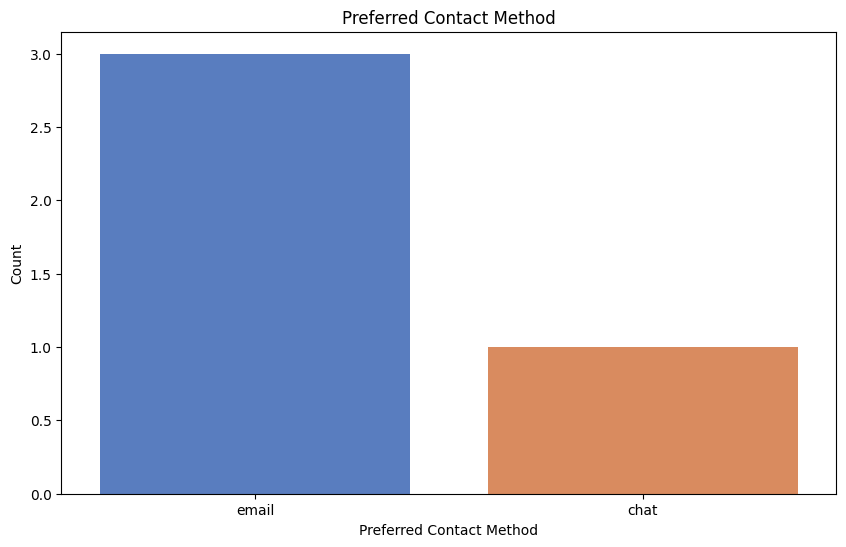

In [ ]:
#Plotting the preferred contact method
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Preferred Contact Method',palette = 'muted')
plt.title("Preferred Contact Method")
plt.xlabel("Preferred Contact Method")
plt.ylabel("Count")
plt.show()

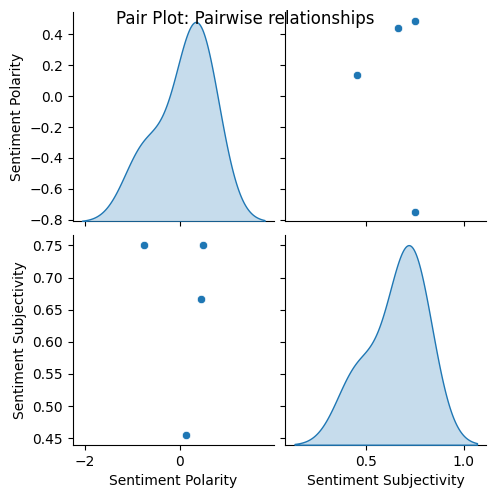

In [ ]:
#Plotting sentiment polarity and subjectivity
sns.pairplot(data=df[['Sentiment Polarity','Sentiment Subjectivity']],
             diag_kind = 'kde')
plt.suptitle("Pair Plot: Pairwise relationships ")
plt.show()

# **SENTIMENT ANALYSIS - DistilBERT Model and Tokenizer**

In [ ]:
!pip install wordcloud matplotlib
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/ch4_feedback_data.csv', header=None)
df.head()

,0,1
0,Your products are excellent. I really love the...,delivery to my location in Los Angeles was a ...
1,The customer service team in New York was help...,NaN
2,The new features in the latest release are fan...,NaN
3,The product didn't meet my expectations,and I'm disappointed. I hope you can address ...
4,Your products are not good. I really don't lik...,delivery to my location in Los Angeles was a ...


In [ ]:

from transformers import pipeline, DistilBertModel, DistilBertTokenizer

# Load pre-trained DistilBERT model and tokenizer
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
sentiment_analysis_bert = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Iterate over the rows and perform sentiment analysis with DistilBERT
sentiment_results_bert = []
for index, row in df.iterrows():
    text = row[0]
    bert_result = sentiment_analysis_bert(text)[0]
    sentiment_label_bert = bert_result['label']
    sentiment_score_bert = bert_result['score']
    sentiment_results_bert.append({"Text": text, "Sentiment Score": sentiment_score_bert, "Sentiment Label": sentiment_label_bert})


# Iterate over the sentiment results and print each entry
for result in sentiment_results_bert:
    print(f"Text: {result['Text']}")
    print(f"Sentiment Score: {result['Sentiment Score']}")
    print(f"Sentiment Label: {result['Sentiment Label']}")
    print()

sentiment_df_bert = pd.DataFrame(sentiment_results_bert)

sentiment_df_bert.to_csv("sentiment_results_bert.csv", index=False)

Text: Your products are excellent. I really love the quality! However
Sentiment Score: 0.574426531791687
Sentiment Label: 5 stars

Text: The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment Score: 0.5543171763420105
Sentiment Label: 4 stars

Text: The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment Score: 0.8357024192810059
Sentiment Label: 5 stars

Text: The product didn't meet my expectations
Sentiment Score: 0.4780275821685791
Sentiment Label: 2 stars

Text: Your products are not good. I really don't like the quality! However
Sentiment Score: 0.5138061046600342
Sentiment Label: 2 stars

Text: The customer service team in San Francisco was not helpful in resolving my issue. But
Sentiment Score: 0.5047702193260193
Sentiment Label: 3 stars

Text: The new features in the latest release are not fantastic! They have not greatly improved th

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
sentiment_df_bert.head()

,Text,Sentiment Score,Sentiment Label
0,Your products are excellent. I really love the...,0.574427,5 stars
1,The customer service team in New York was help...,0.554317,4 stars
2,The new features in the latest release are fan...,0.835702,5 stars
3,The product didn't meet my expectations,0.478028,2 stars
4,Your products are not good. I really don't lik...,0.513806,2 stars


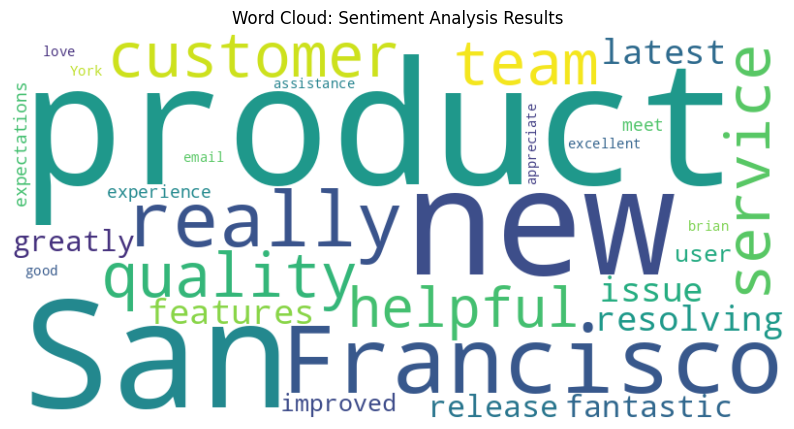

In [ ]:
from wordcloud import WordCloud
text_combined = ' '.join(sentiment_df_bert['Text'])
wordcloud = WordCloud(width = 800,height = 400, background_color = 'white', colormap = 'viridis').generate(text_combined)
#Plotting the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Sentiment Analysis Results")
plt.show()

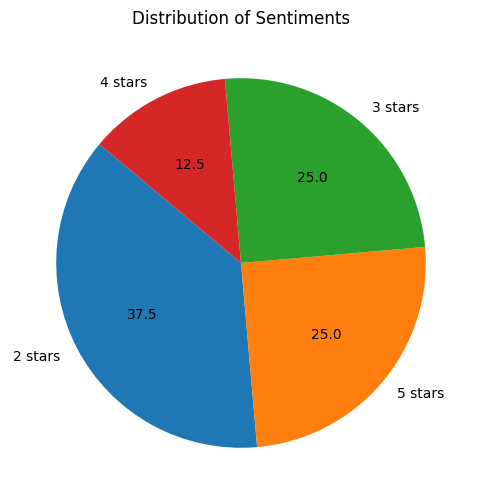

In [ ]:
#Counting the ocurrences of each setiment label
sentiment_label_counts = sentiment_df_bert["Sentiment Label"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct = "%1.1f", startangle = 140)
plt.title("Distribution of Sentiments")
plt.show()

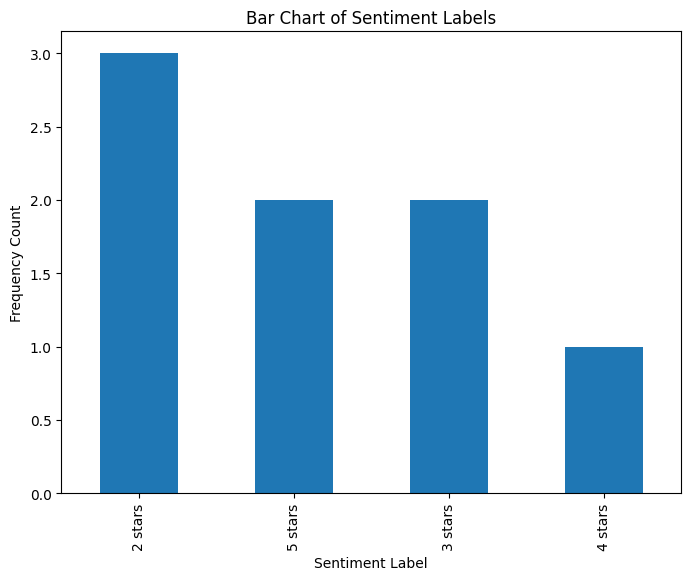

In [ ]:
sentiment_label_counts = sentiment_df_bert["Sentiment Label"].value_counts()
plt.figure(figsize=(8,6))
sentiment_label_counts.plot(kind='bar',stacked=True)
plt.title("Bar Chart of Sentiment Labels")
plt.xlabel("Sentiment Label")
plt.ylabel("Frequency Count")
plt.show()

In [ ]:
import torch
from transformers import RobertaModel, RobertaTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, DataCollatorWithPadding
from peft import LoraConfig, get_peft_model
from datasets import load_dataset

ModuleNotFoundError: No module named 'peft'

In [ ]:
# Install the required packages using pip
!pip install peft
!pip install transformers  # Library for transformer-based models like BERT, RoBERTa
!pip install datasets  # Library for accessing and managing datasets for NLP tasks
!pip install evaluate  # Library for evaluating model performance on various tasks
!pip install accelerate  # Library for accelerating training and inference with PyTorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 10.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.3 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
#Define model names
roberta_model_name = 'roberta-base-peft'
modified_base = 'roberta-base-modified'
base_model = 'roberta-base'

In [ ]:
#loading the dataset
dataset = load_dataset('ag_news')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
#initializing the tokenizer
tokenizer = RobertaTokenizer.from_pretrained(base_model)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
#define preprocessing function
def preprocess(examples):
  tokenized = tokenizer(examples['text'],truncation=True,padding=True)
  return tokenized

In [ ]:
#applying preprocessing , removing text column
tokenized_dataset = dataset.map(preprocess,batched=True,remove_columns=["text"])

Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
#split the tokenized dataset into train,evaluation, test datasets
train_dataset = tokenized_dataset['train']
eval_dataset = tokenized_dataset['test'].shard(num_shards=2,index=0)
test_dataset = tokenized_dataset['test'].shard(num_shards=2,index=1)

In [ ]:
#exttracting number of classes and names
num_labels= dataset['train'].features['label'].num_classes
class_names = dataset["train"].features["label"].names
print(f"number of labels : {num_labels}")
print(f"the labels : {class_names}")

number of labels : 4
the labels : ['World', 'Sports', 'Business', 'Sci/Tech']


In [ ]:
#creating an id2label mapping
id2label = {i:label for i, label in enumerate(class_names)}
data_collector = DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='pt')

In [ ]:
#defining training arguments fo rmodel training:
training_args = TrainingArguments(output_dir = './results',
                                  evaluation_strategy = 'steps',
                                  learning_rate = 5e-5,
                                  num_train_epochs = 1,
                                  per_device_train_batch_size = 16,)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#defining a function to create a Trainer object for model training
def get_trainer(model):
  return Trainer(
      model = model,
      args = training_args,
      train_dataset = train_dataset,
      eval_dataset = eval_dataset,
      tokenizer = tokenizer,
      data_collator = data_collector,
  )

In [ ]:
#creating the trainer object
full_fine_tuning_trainer = get_trainer(AutoModelForSequenceClassification.from_pretrained(base_model, id2label=id2label),
                                       )
full_fine_tuning_trainer.train()

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
#PEFT training
model = AutoModelForSequenceClassification.from_pretrained(base_model,id2label=id2label)

NameError: name 'AutoModelForSequenceClassification' is not defined

In [ ]:
#configuring the lora  parameters for peft (proxy experience finetuning)
peft_config = LoraConfig(task_type='SEQ_CLS',inference_mode=False,r=8,lora_alpha=16,lora_dropout=0.10)


In [ ]:
#Applying lora parameters to the model
peft_model = get_peft_model(model,peft_config)

In [ ]:
#Printing info about peft model's traininable parameters
print('PEFT model')
peft_model.print_trainable_parameters()

PEFT model
trainable params: 888,580 || all params: 125,537,288 || trainable%: 0.7078


In [ ]:
#obtaining a trainer object for lora fine tuning
peft_lora_finetuning_trainer = get_trainer(peft_model)

In [ ]:
peft_lora_finetuning_trainer.train()


In [ ]:
tokenizer.save_pretrained(modified_base)
peft_model.save_pretrained(peft_model_name)

# **PERFORMING INFERENCE WITH A PEFT MODEL**

In [ ]:
from transformers import AutoTokenizer
from peft import AutoPeftModelForSequenceClassification


In [ ]:
#LOAD THE SAVED PEFT MODEL
inference_model = AutoPeftModelForSequenceClassification.from_pretrained(peft_model_name,id2label=id2label)
tokenizer = AutoTokenizer.from_pretrained(modified_base)

In [ ]:
def classify(text):
  inputs = tokenizer(text, truncation=True,padding=True, return_tensors="pt")
  output = inference_model(**inputs)

  #extract the predicted class index from the model output
  prediction = output.logits.argmax(dim=-1).item()
 print(f'\n Class: {prediction},Label:{id2label[prediction]},Text:{text}')



In [ ]:
classify("Kederts proclaims innocence Olympic champion Kostas Kederis today left hospital")
classify("Wall St. Bears Claw Back Into the Black(Reuters) Reuters - Short-sellers,Wall Street")

# **EVALUATE MODELS**

In [ ]:
#import necc modules
from torch.utils.data import DataLoader
from tqdm import tqdm
import evaluate

In [ ]:
metric = evaluate.load('accuracy')

In [ ]:
def evaluate_model(inference_model,dataset):
  eval_dataloader = DataLoader(dataset.rename_column("label","labels"),batch_size = 8,
                               collate_fn = data_collator)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  inference_mode.to(device)
  inference_model.eval()

  for step, batch in enumerate(tqdm(eval_dataloader)):
    batch.to(device)
    with torch.no_grad():
      outputs = inference_model(**batch)
    predictions = outputs.logits.argmax(dim=-1)
    predictions,references = predictions,batch["labels"]
    metric.add_batch(predictions=predictions, references=references,)

    eval_metric = metric.compute()
    print(eval_metric)



In [ ]:
evaluate_model(AutoModelForSequenceClassification.from_pretrained(base_model, id2label=id2label), test_dataset)


In [ ]:
evaluate_model(inference_model, test_dataset)


In [ ]:
evaluate_model(full_finetuning_trainer.model, test_dataset)
